In [141]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
import pickle

In [49]:
df=pd.read_csv('XNSE-ADSL.csv')
df=df.iloc[:,:6]

In [50]:
df=df[df.Volume!=0] #holiday

In [51]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-03-22,14.80,14.80,13.65,13.75,12653
2,2019-03-20,14.90,14.90,13.50,14.10,15888
3,2019-03-19,15.40,15.40,13.95,14.45,80880
4,2019-03-18,14.65,15.85,14.65,15.00,31383
5,2019-03-15,16.20,16.30,15.20,15.30,24096


In [52]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

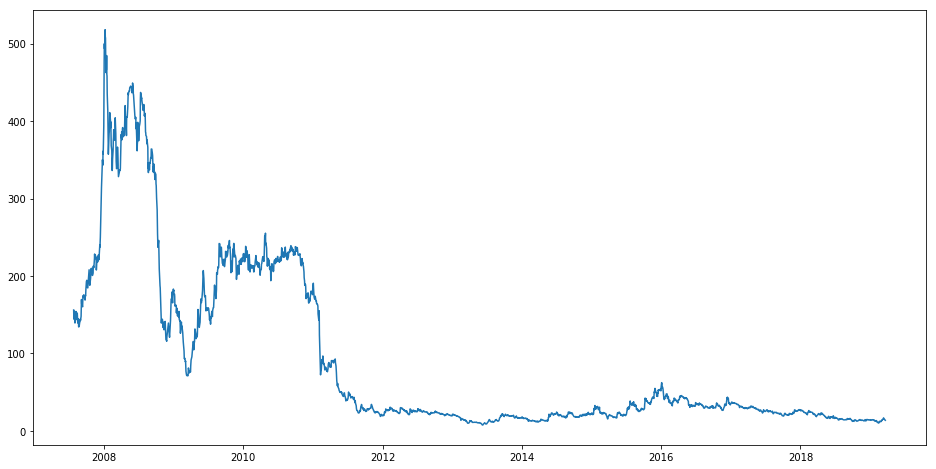

In [53]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [54]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


In [55]:
def check_if_last_day_of_week(date):
        import datetime
        import calendar
        #  calendar.monthrange return a tuple (weekday of first day of the 
        #  month, number  
        #  of days in month)
        last_day_of_month = calendar.monthrange(date.year, date.month)[1]
        # here i check if date is last day of month
        if date == datetime.date(date.year, date.month, last_day_of_month):
            return True
        return False

In [56]:
import datetime
new_data['dayOfWeek'] = 0
new_data['mon_fri'] = 0
new_data['endOfMonth'] = 0
#print(new_data['dayOfWeek'])
for i in range(0,len(new_data)):
    enum=new_data['Date'][i].weekday()
    new_data['dayOfWeek'][i]=enum
    if (new_data['dayOfWeek'][i] == 0 or new_data['dayOfWeek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0
    end=check_if_last_day_of_week(new_data['Date'][i].date())
    if(end==True):
        new_data['endOfMonth'][i]=1
    else:
        new_data['endOfMonth'][i]=0    

/home/ravindra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ravindra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/ravindra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ravindra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyW

In [65]:
day=new_data['Date'].dt.day.to_frame(name='day')
month=new_data['Date'].dt.month.to_frame(name='month')
year=new_data['Date'].dt.year.to_frame(name='year')

In [69]:
X=new_data.drop(columns=['Date','Close'])
X=pd.concat([X,day,month,year],axis=1)

In [70]:
X.head()

,dayOfWeek,mon_fri,endOfMonth,day,month,year
0,3,0,0,26,7,2007
1,4,1,0,27,7,2007
2,0,1,0,30,7,2007
3,1,0,1,31,7,2007
4,2,0,0,1,8,2007


In [71]:
y=new_data['Close']

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=False)

In [106]:
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_valid_scaled = scaler.fit_transform(X_valid)
X_valid = pd.DataFrame(X_valid_scaled)

In [107]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression(fit_intercept=True, normalize=True)
# model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [142]:
#filename = 'LinearRegression.sav'
#pickle.dump(model, open(filename, 'wb'))

In [143]:
model=pickle.load(open(filename, 'rb'))

In [144]:
pred=model.predict(X_valid)

In [145]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid, pred)

19204.020387110733

In [137]:
x_axis=y_valid.to_frame(name='true')
y_axis=pd.Series(pred).to_frame(name='predict')
y_axis.index+=0.33*len(new_data)
plotFrame=pd.concat([x_axis,y_axis],axis=1)

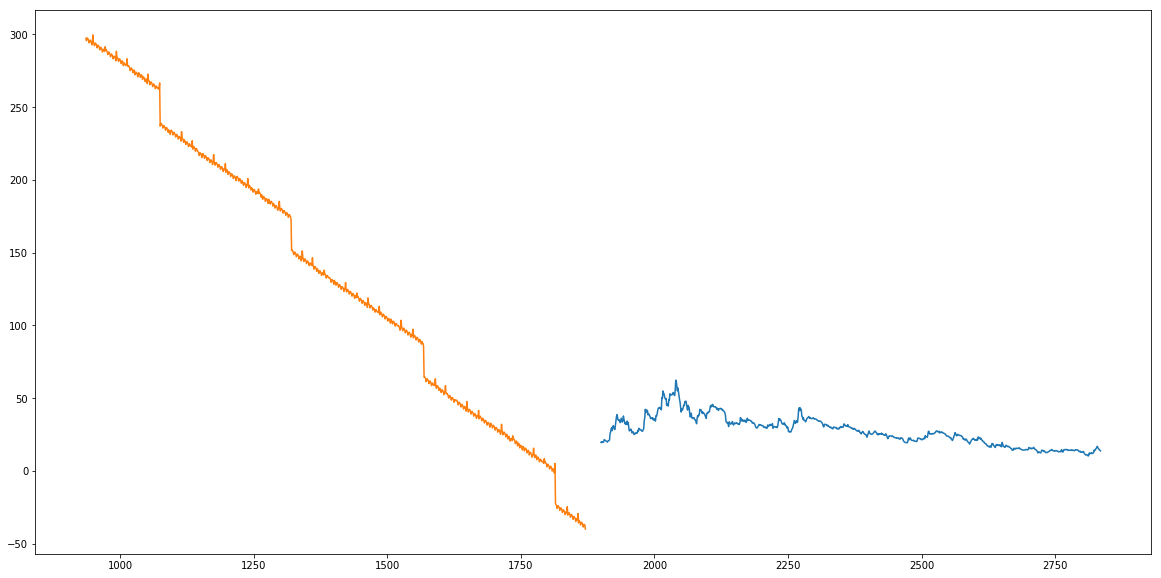

In [139]:
#plot
# valid['Predictions'] = 0
# valid['Predictions'] = preds

# valid.index = new_data[987:].index
# train.index = new_data[:987].index

plt.plot(plotFrame[['true','predict']])
# plt.plot(valid[['Close', 'Predictions']])